# **Billboard "The Hot 100" Songs**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('charts.csv')

In [3]:
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [4]:
df.shape

(330087, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.6+ MB


In [6]:
df.describe()

,rank,last-week,peak-rank,weeks-on-board
count,330087.000000,297775.000000,330087.000000,330087.000000
mean,50.500929,47.591631,40.970629,9.161785
std,28.866094,28.054360,29.347481,7.618264
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,23.000000,13.000000,4.000000
50%,51.000000,47.000000,38.000000,7.000000
75%,76.000000,72.000000,65.000000,13.000000
max,100.000000,100.000000,100.000000,90.000000


## **Data Cleaning**

In [7]:
df.isna().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

### Filling null values with mean

In [8]:
df["last-week"]=df["last-week"].fillna(df["last-week"]).mean()

In [9]:
df.isna().sum()

date              0
rank              0
song              0
artist            0
last-week         0
peak-rank         0
weeks-on-board    0
dtype: int64

In [10]:
df["date"]=pd.DatetimeIndex(df["date"])
df["year"]=pd.DatetimeIndex(df["date"]).year
df["month"]=pd.DatetimeIndex(df["date"]).month

In [11]:
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,year,month
0,2021-11-06,1,Easy On Me,Adele,47.591631,1,3,2021,11
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,47.591631,1,16,2021,11
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,47.591631,1,14,2021,11
3,2021-11-06,4,Fancy Like,Walker Hayes,47.591631,3,19,2021,11
4,2021-11-06,5,Bad Habits,Ed Sheeran,47.591631,2,18,2021,11


## **Top 12 Artists**

In [12]:
df2 = df['artist']
artist_cou = {'Artist':list(df2.value_counts().index),
               'Count':list(df2.value_counts().values)}
artist_df = pd.DataFrame(artist_cou)
artist_df.head(12)


,Artist,Count
0,Taylor Swift,1023
1,Elton John,889
2,Madonna,857
3,Drake,787
4,Kenny Chesney,769
5,Tim McGraw,731
6,Keith Urban,673
7,Stevie Wonder,659
8,Rod Stewart,657
9,Mariah Carey,621


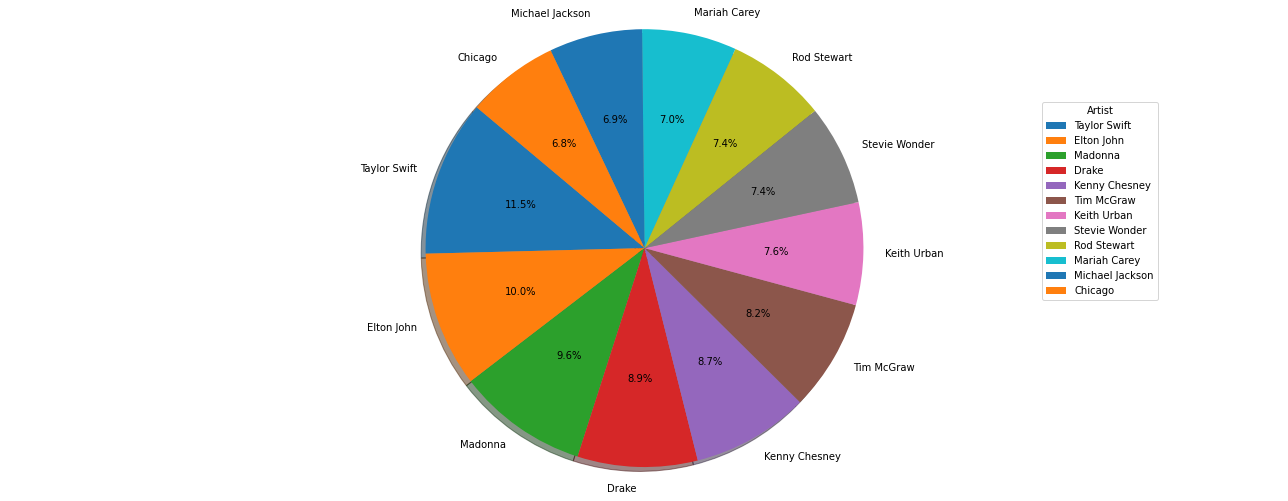

In [13]:

name = artist_df['Artist'].head(12)
count = artist_df['Count'].head(12)

fig = plt.figure(figsize =(18, 7))
 
plt.pie(count, labels=name,
autopct='%1.1f%%', shadow=True, startangle=140)

fig.legend(bbox_to_anchor=(0.9, 0.8),title = 'Artist')

plt.tight_layout()
plt.axis('equal')
plt.show()

We can see that Taylor Swift is the top Artist in the list

## **Most Listened Songs**

In [14]:
df2 = df['song']
song_cou = {'Song':list(df2.value_counts().index),
               'Count':list(df2.value_counts().values)}
songs_df = pd.DataFrame(song_cou)
songs_df.head(12)


,Song,Count
0,Stay,224
1,Angel,205
2,Hold On,202
3,You,195
4,Heaven,194
5,I Like It,188
6,Crazy,176
7,Without You,174
8,Forever,164
9,Happy,157


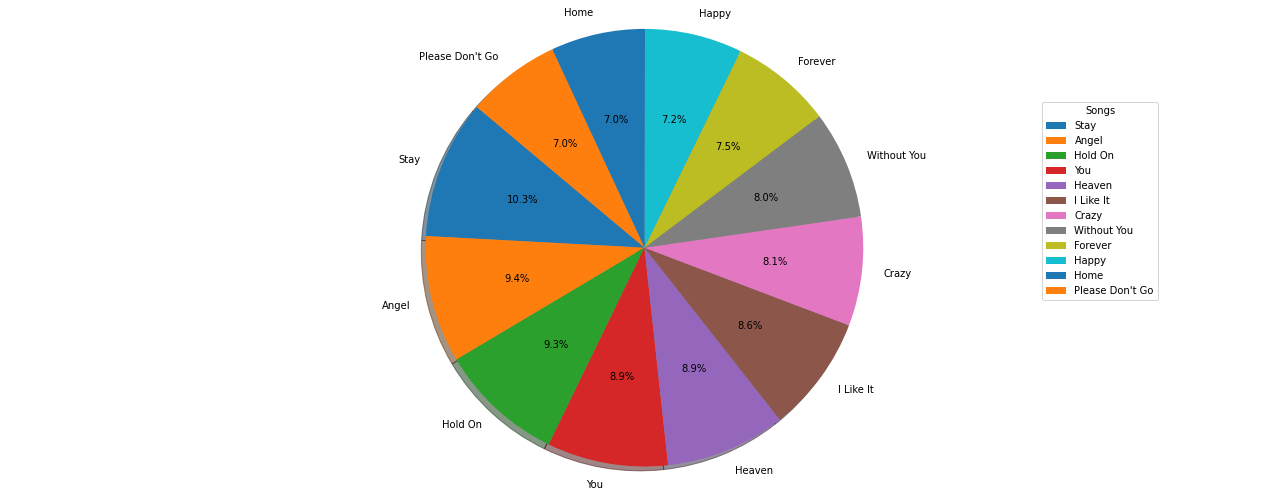

In [15]:
song = songs_df['Song'].head(12)
count = songs_df['Count'].head(12)
 
fig = plt.figure(figsize =(18, 7))
 
plt.pie(count, labels=song,
autopct='%1.1f%%', shadow=True, startangle=140)

fig.legend(bbox_to_anchor=(0.9, 0.8),title = 'Songs')

plt.tight_layout()
plt.axis('equal')
plt.show()

We can see that Stay is the most listened song in the list

## **Artist with rank 1 songs who had the most appearances**

In [16]:
df[df['rank']==1]['artist'].value_counts().head(20)

Mariah Carey                           65
The Beatles                            54
Boyz II Men                            34
Madonna                                32
Drake                                  31
Whitney Houston                        31
Michael Jackson                        30
The Black Eyed Peas                    28
Bee Gees                               27
Adele                                  26
Elton John                             23
Usher                                  22
Janet Jackson                          21
Elvis Presley With The Jordanaires     21
Taylor Swift                           19
The Supremes                           19
Lil Nas X Featuring Billy Ray Cyrus    19
Katy Perry                             18
TLC                                    18
Rod Stewart                            17
Name: artist, dtype: int64

## **Top featured songs all time**

<AxesSubplot:xlabel='song,year'>

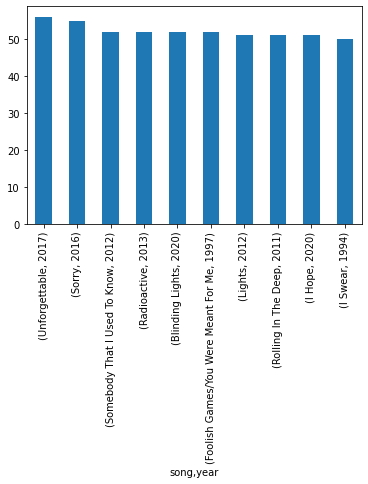

In [17]:
x = df.groupby(by=df["song"])["year"].value_counts().sort_values(ascending=False)
x.head(10).plot(kind="bar")

## **Top featured artists all time**

<AxesSubplot:xlabel='artist,year'>

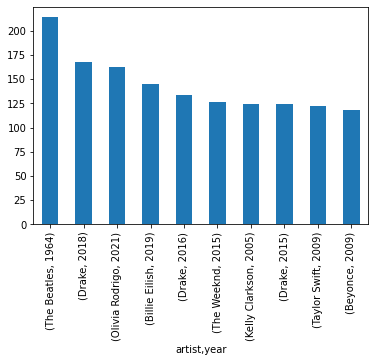

In [18]:
x = df.groupby(by=df["artist"])["year"].value_counts().sort_values(ascending=False)
x.head(10).plot(kind="bar")

## **Top songs and artists of 2020**

In [19]:
df[(df["year"]==2020) & (df["rank"]==1)]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,year,month
4500,2020-12-26,1,Willow,Taylor Swift,47.591631,1,1,2020,12
4600,2020-12-19,1,All I Want For Christmas Is You,Mariah Carey,47.591631,1,41,2020,12
4700,2020-12-12,1,Mood,24kGoldn Featuring iann dior,47.591631,1,17,2020,12
4800,2020-12-05,1,Life Goes On,BTS,47.591631,1,1,2020,12
4900,2020-11-28,1,Mood,24kGoldn Featuring iann dior,47.591631,1,15,2020,11
5000,2020-11-21,1,Mood,24kGoldn Featuring iann dior,47.591631,1,14,2020,11
5100,2020-11-14,1,Mood,24kGoldn Featuring iann dior,47.591631,1,13,2020,11
5200,2020-11-07,1,Positions,Ariana Grande,47.591631,1,1,2020,11
5300,2020-10-31,1,Mood,24kGoldn Featuring iann dior,47.591631,1,11,2020,10
5400,2020-10-24,1,Mood,24kGoldn Featuring iann dior,47.591631,1,10,2020,10


## **Top songs and artist of FEB Month of year 2020**

In [20]:
df[(df["year"]==2020) & (df["rank"]==1) & (df["month"]==2)]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,year,month
8800,2020-02-29,1,The Box,Roddy Ricch,47.591631,1,11,2020,2
8900,2020-02-22,1,The Box,Roddy Ricch,47.591631,1,10,2020,2
9000,2020-02-15,1,The Box,Roddy Ricch,47.591631,1,9,2020,2
9100,2020-02-08,1,The Box,Roddy Ricch,47.591631,1,8,2020,2
9200,2020-02-01,1,The Box,Roddy Ricch,47.591631,1,7,2020,2


The Box from Roddy Ricch is the top song of FEB 2020

## **Most Liked Song of the Artist**

In [21]:
df[["artist", "song", "peak-rank"]].value_counts().head(12)

artist                                     song                     peak-rank
The Weeknd                                 Blinding Lights          1            74
Ed Sheeran                                 Shape Of You             1            58
Jason Mraz                                 I'm Yours                6            56
The Black Eyed Peas                        I Gotta Feeling          1            54
LMFAO Featuring Lauren Bennett & GoonRock  Party Rock Anthem        1            54
Justin Timberlake                          Can't Stop The Feeling!  1            52
The Chainsmokers Featuring Halsey          Closer                   1            50
Post Malone                                Circles                  1            50
Taylor Swift                               Shake It Off             1            50
Mark Ronson Featuring Bruno Mars           Uptown Funk!             1            49
Adele                                      Rolling In The Deep      1            4

Shape of You from ED Sheeran is the most liked Song.